In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from GetData import *

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

Set parameters for graphs:

In [56]:
O3_colormap = plt.colormaps["coolwarm"]
O4_colormap = plt.colormaps["coolwarm"]

O3_colormap_range = (min(O4_BBH["chirp_mass"]), 70)
O4_colormap_range = (min(O4_BBH["chirp_mass"]), 70)

sub_O3 = O3_BBH#[(O3_BBH["chirp_mass"] != 47.5)] #& (O3_BBH["chirp_mass_source"] != 7.49)]
sub_O4 = O4_BBH[(O4_BBH['chirp_mass'] < 140) & (O4_BBH['snr'] < 35)]

include_greater_then_tick = True

O4_SNR_scale_factor = 1.6

In [57]:
plot_sub_O3 = O3_BBH
include_fit = True
include_colorbar = True
scale = "log"

title = "Fitting Our Model"
x_label = "Luminosity Distance (Parsec)"
y_label = "Signal To Noise Ratio"

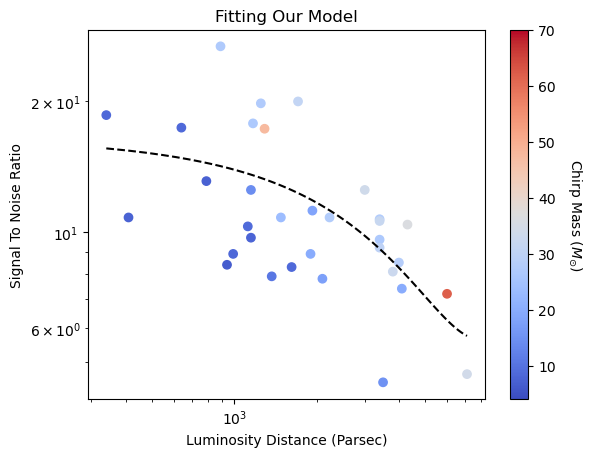

In [58]:
sc = plt.scatter(plot_sub_O3["luminosity_distance"], plot_sub_O3["network_matched_filter_snr"], c = plot_sub_O3["chirp_mass"], cmap=O3_colormap, vmin=O3_colormap_range[0], vmax=O3_colormap_range[1])

if include_fit:
    coefficients = np.polyfit(plot_sub_O3["luminosity_distance"], plot_sub_O3["network_matched_filter_snr"], 2)
    fit_line_O3_BBH = np.poly1d(coefficients)
    x = np.linspace(min(plot_sub_O3["luminosity_distance"]), max(plot_sub_O3["luminosity_distance"]), 100)
    plt.plot(x, fit_line_O3_BBH(x), linestyle="--", color="black")

if include_colorbar:
    cbar = plt.colorbar(sc)
    cbar.ax.get_yaxis().labelpad = 20
    cbar.ax.set_ylabel('Chirp Mass ($M_{\odot}$)', rotation=270)

if title is not None:
    plt.title(title)
plt.yscale(scale) 
plt.xscale(scale) 
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [59]:
plot_sub_O3 = sub_O3
include_colorbar = True
scale = "log"

linspace_range = (1, 5)

title = "Fitting Our Model"
x_label = "Chirp Mass ($M_{\odot}$)"
y_label = "SNR $\\times$ Luminosity Distance"

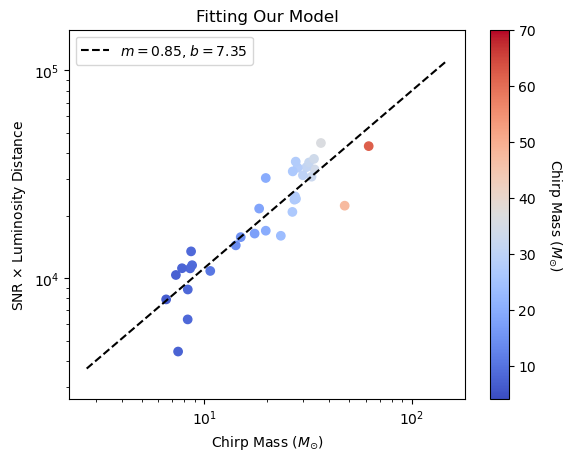

In [60]:
sc = plt.scatter(plot_sub_O3["chirp_mass_source"], plot_sub_O3["luminosity_distance"] * plot_sub_O3["network_matched_filter_snr"], c = plot_sub_O3["chirp_mass"], cmap=O3_colormap, vmin=O3_colormap_range[0], vmax=O3_colormap_range[1])

coefficients = np.polyfit(np.log(plot_sub_O3["chirp_mass_source"]), np.log(plot_sub_O3["luminosity_distance"] * plot_sub_O3["network_matched_filter_snr"]), 1)
m_DL, b_DL = coefficients
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(linspace_range[0], linspace_range[1], 2)
plt.plot(np.e ** x, np.e ** fit_line_O3_BBH(x), color="black", linestyle="--", label=f"$m={m_DL:.2f}$, $b={b_DL:.2f}$")

if include_colorbar:
    cbar = plt.colorbar(sc)
    cbar.ax.get_yaxis().labelpad = 20
    cbar.ax.set_ylabel('Chirp Mass ($M_{\odot}$)', rotation=270)

if title is not None:
    plt.title(title)

plt.legend()
plt.yscale(scale)
plt.xscale(scale)
plt.axis('equal')
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.show()

In [61]:
plot_sub_O3 = sub_O3
include_colorbar = True
include_r2score = True
scale = "linear"

linspace_range = (1, 9)

title = "Testing Our Model"
x_label = "Predicted Luminosity Distance"
y_label = "Actual Luminosity Distance"

In [62]:
predicted_luminosity_distances = m_DL * np.log(plot_sub_O3["chirp_mass"]) - np.log(plot_sub_O3["network_matched_filter_snr"]) + b_DL
residuals = plot_sub_O3["luminosity_distance"] -  (np.e ** predicted_luminosity_distances)
x = np.e ** np.linspace(linspace_range[0], linspace_range[1], 2)

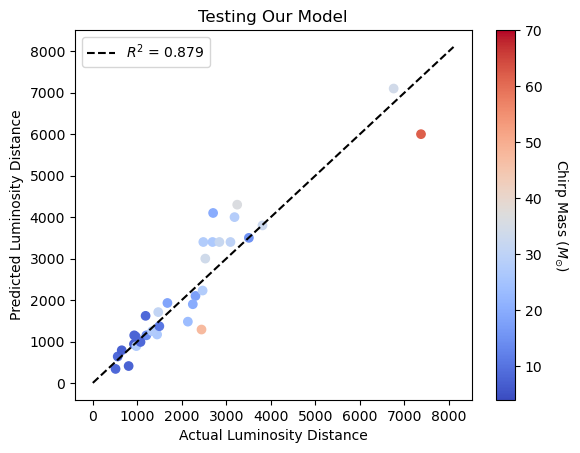

In [63]:
sc = plt.scatter(np.e ** predicted_luminosity_distances, plot_sub_O3["luminosity_distance"], c = plot_sub_O3["chirp_mass"], cmap=O3_colormap, vmin=O3_colormap_range[0], vmax=O3_colormap_range[1])

plt.plot(x,x, color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(plot_sub_O3["luminosity_distance"]), predicted_luminosity_distances)))

if include_colorbar:
    cbar = plt.colorbar(sc)
    cbar.ax.get_yaxis().labelpad = 20
    cbar.ax.set_ylabel('Chirp Mass ($M_{\odot}$)', rotation=270)

if include_r2score:
    plt.legend()

if title is not None:
    plt.title(title)

plt.ylabel(x_label)
plt.yscale(scale)
plt.xlabel(y_label)
plt.xscale(scale)
plt.show()

In [64]:
include_colorbar = True
include_r2score = True

title = None
x_label = "Actual Luminosity Distance"
y_label = "Residuals"

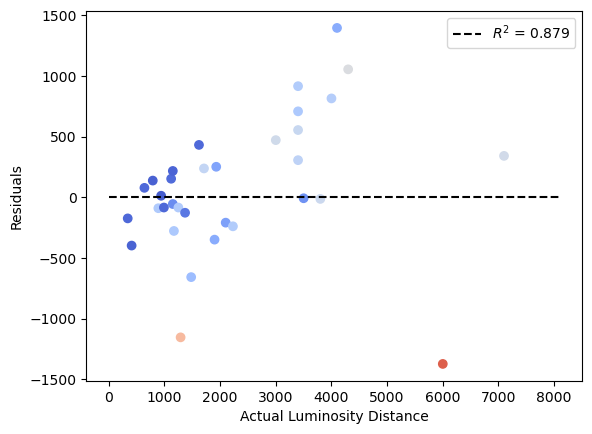

In [65]:
plt.plot(x,np.zeros(2), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(plot_sub_O3["luminosity_distance"]), predicted_luminosity_distances)))
plt.scatter(plot_sub_O3["luminosity_distance"], residuals, c = plot_sub_O3["chirp_mass"], cmap=O3_colormap, vmin=O3_colormap_range[0], vmax=O3_colormap_range[1])

if include_colorbar:
    cbar = plt.colorbar(sc)
    cbar.ax.get_yaxis().labelpad = 20
    cbar.ax.set_ylabel('Chirp Mass ($M_{\odot}$)', rotation=270)

if include_r2score:
    plt.legend()

if title is not None:
    plt.title(title)

plt.ylabel(y_label)
plt.xlabel(x_label)
plt.xscale(scale)
plt.show()

In [66]:
include_colorbar = True

bins = 8

include_r2score = False

title = None
x_label = "Actual Luminosity Distance"
y_label = "Residuals"

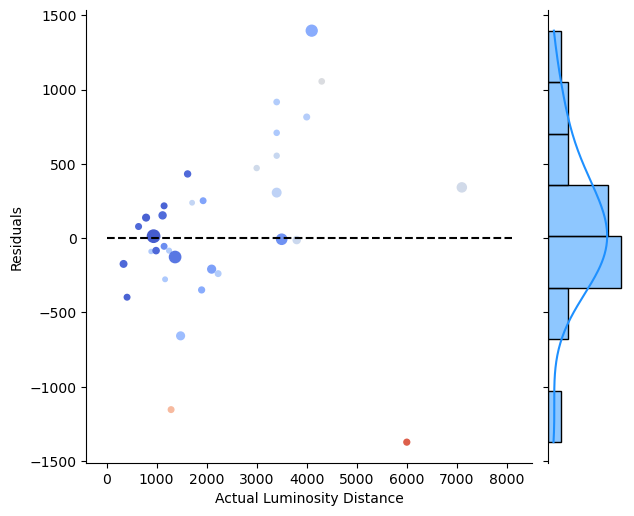

In [67]:
g = sns.JointGrid()
g.plot_marginals(sns.histplot, kde=True, bins=bins)

g.ax_marg_x.remove()

sns.histplot(y=residuals, color="dodgerblue", kde=True, bins=bins, ax=g.ax_marg_y)

g.ax_joint.plot(x,np.zeros(2), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(plot_sub_O3["luminosity_distance"]), predicted_luminosity_distances)))

sc = g.ax_joint.scatter(plot_sub_O3["luminosity_distance"], residuals, s=100 * plot_sub_O3["mass_dos"], c=plot_sub_O3["chirp_mass"], cmap=O3_colormap, vmin=O3_colormap_range[0], vmax=O3_colormap_range[1])

if include_r2score:
    g.ax_joint.legend()

if title is not None:
    g.ax_joint.set_title(title)

g.ax_joint.set_ylabel(y_label)
g.ax_joint.set_xlabel(x_label)
g.ax_joint.set_xscale(scale)
plt.show()

In [68]:
plot_sub_O3 = sub_O3
plot_sub_O4 = sub_O4
include_O3_colorbar = False
include_O4_colorbar = True

include_O3_colorbar_ticks = False
include_O3_colorbar_label = False
include_O3_greater_then_tick = True
include_O4_colorbar_ticks = True

y_scale = "linear"
x_scale = "linear"

title = None
x_label = "Luminosity Distance (Parsec)"
y_label = "Signal to Noise Ratio"

In [69]:
def predict_luminosity_distance(df, m, b, c):
    return (np.e ** b) * (df['chirp_mass'] ** m) / (c * df['snr'])

predicted_O4_luminosity_distances = predict_luminosity_distance(plot_sub_O4, m_DL, b_DL, O4_SNR_scale_factor)

O4_ticks = list(range(int(O4_colormap_range[0] - O4_colormap_range[0] % 10), int(O4_colormap_range[1] + 1), 10))
O3_ticks = list(range(int(O4_colormap_range[0] - O4_colormap_range[0] % 10), int(O4_colormap_range[1] + 1), 10))

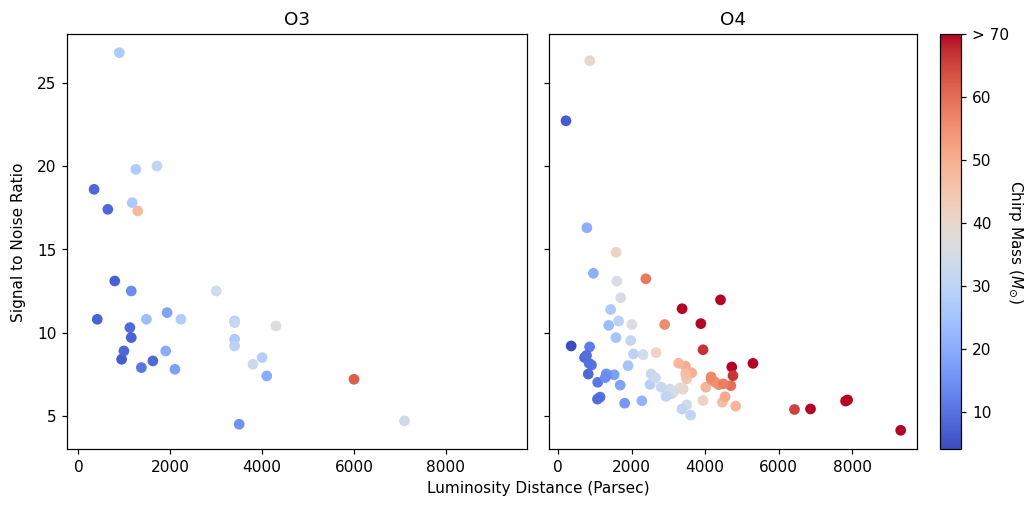

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharex=True, sharey=True)
fig.add_subplot(111, frameon=False)

sc = ax1.scatter(plot_sub_O3["luminosity_distance"], plot_sub_O3["snr"], c = plot_sub_O3["chirp_mass"], cmap=O3_colormap, vmin=O3_colormap_range[0], vmax=O3_colormap_range[1])
ax1.set_title("O3")
ax1.set_xscale(x_scale)

if include_O3_colorbar:
    cbar1 = None
    if include_O3_colorbar_ticks:
        cbar1 = plt.colorbar(sc, ax=ax1, ticks=O3_ticks)
        if include_O3_greater_then_tick:
            cbar1.ax.set_yticklabels([str(t) for t in O3_ticks[0:-1]] + [f"> {O3_ticks[-1]}"])
    else:
        cbar1 = plt.colorbar(sc, ax=ax1)
        cbar1.set_ticks([])
    if include_O3_colorbar_label:
        cbar1.ax.get_yaxis().labelpad = 10
        cbar1.ax.set_ylabel('Chirp Mass ($M_{\odot}$)', rotation=270)

sc = ax2.scatter(predicted_O4_luminosity_distances, plot_sub_O4["snr"], c = plot_sub_O4["chirp_mass"], cmap=O4_colormap, vmin=O4_colormap_range[0], vmax=O4_colormap_range[1])

ax2.set_title("O4")
ax2.set_xscale(x_scale)

if include_O4_colorbar:
    cbar2 = None
    if include_O4_colorbar_ticks:
        cbar2 = plt.colorbar(sc, ax=ax2, ticks=O4_ticks)
        if include_greater_then_tick:
            cbar2.ax.set_yticklabels([str(t) for t in O4_ticks[0:-1]] + [f"> {O4_ticks[-1]}"])
    else:
        cbar2 = plt.colorbar(sc, ax=ax2)
    cbar2.ax.get_yaxis().labelpad = 10
    cbar2.ax.set_ylabel('Chirp Mass ($M_{\odot}$)', rotation=270)
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.yscale(y_scale)

plt.xlabel(x_label)
plt.ylabel(y_label)

if title is not None:
    plt.title(title)

plt.tight_layout()
plt.show()

In [71]:
include_O3_colorbar = True
include_O4_colorbar = True
include_O4_colorbar_ticks = True

y_scale = "linear"
x_scale = "log"

title = None
x_label = "Luminosity Distance (Parsec)"
y_label = "Signal to Noise Ratio"

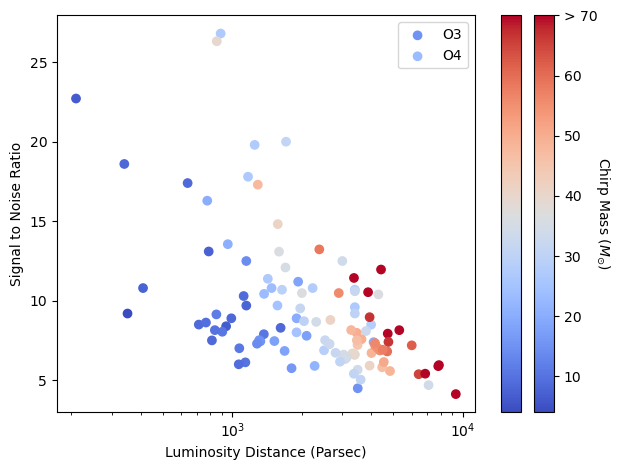

In [72]:
sc1 = plt.scatter(plot_sub_O3["luminosity_distance"], plot_sub_O3["snr"], c = plot_sub_O3["chirp_mass"], cmap=O3_colormap, vmin=O3_colormap_range[0], vmax=O3_colormap_range[1], label="O3")

sc2 = plt.scatter(predicted_O4_luminosity_distances, plot_sub_O4["snr"], c = plot_sub_O4["chirp_mass"], cmap=O4_colormap, vmin=O4_colormap_range[0], vmax=O4_colormap_range[1], label="O4")
if include_O4_colorbar:
    cbar2 = None
    if include_O4_colorbar_ticks:
        if include_O3_colorbar:
            cbar2 = plt.colorbar(sc2, ticks=O4_ticks, pad=-0.08)
        else:
            cbar2 = plt.colorbar(sc2, ticks=O4_ticks)
        cbar2.ax.set_yticklabels([str(t) for t in O4_ticks[0:-1]] + [f"> {O4_ticks[-1]}"])
    else:
        if include_O3_colorbar:
            cbar2 = plt.colorbar(sc2, pad=-0.08)
        else:
            cbar2 = plt.colorbar(sc2)
    cbar2.ax.get_yaxis().labelpad = 10
    cbar2.ax.set_ylabel('Chirp Mass ($M_{\odot}$)', rotation=270)
if include_O3_colorbar:
    cbar1 = plt.colorbar(sc1)
    cbar1.set_ticks([])

plt.xscale(x_scale)
plt.yscale(y_scale)

plt.legend()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.tight_layout()
plt.show()